In [122]:
# Author - Puneet Soni
# Object X detection using feature matching

#Feature Matching using Harris Corner Detection

import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import time

In [123]:
start_time = time.perf_counter()
# speed-up using multithreads

cv2.setUseOptimized(True);
cv2.setNumThreads(8);

# Read the query image and input image files

img1 =  cv2.imread('image_data_set/sample_test_image_query_1.png',0)
img2 =  cv2.imread('image_data_set/sample_test_image_1.png',0)


In [124]:
# Initiate SIFT detector
sift =  cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SURF
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [125]:
# BFMatcher with default params
bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2,k=2)

In [126]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img_output_1 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:200],None,flags=2)
Total_Execution_Time = time.perf_counter() - start_time

In [127]:
# Define how similar they are
number_keypoints = 0
if len(kp1) <= len(kp2):
    number_keypoints = len(kp1)
else:
    number_keypoints = len(kp2)
print("Keypoints 1ST Image: " + str(len(kp1)))
print("Keypoints 2ND Image: " + str(len(kp2)))

Keypoints 1ST Image: 421
Keypoints 2ND Image: 1403


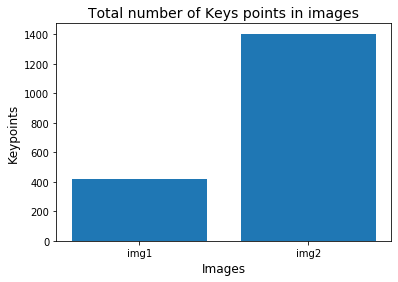

In [128]:
image_array = ['img1','img2']
keypoints_array = [len(kp1),len(kp2)]

plt.bar(image_array, keypoints_array)
plt.title('Total number of Keys points in images', fontsize=14)
plt.xlabel('Images', fontsize='large')
plt.xticks()
plt.ylabel('Keypoints', fontsize='large')

plt.show()

In [129]:
print("GOOD Matches from query image:", len(good))
print("Features Matching Percentage: ", len(good) / number_keypoints * 100, "%")

GOOD Matches from query image: 408
Features Matching Percentage:  96.91211401425178 %


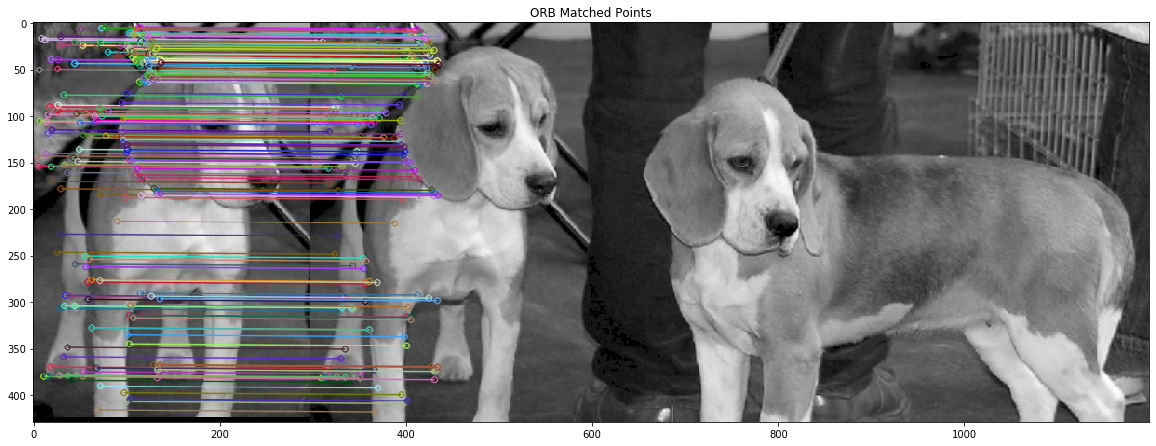

True

In [134]:
plt.figure(figsize=(20, 20))
plt.title('ORB Matched Points')
plt.imshow(img_output_1)
plt.show()
cv2.imwrite('matching_results/IMAGE_SIFT_OUTPUT_1.png',img_output_1)

In [131]:
#Total_Execution_Time = time.perf_counter() - start_time
print(Total_Execution_Time, "seconds")

0.3475041000001511 seconds
